#📌 Extracción

In [12]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# URL del archivo JSON en formato RAW
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Obtener los datos desde la API (repositorio GitHub)
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    data_json = response.json()
    # Convertir a DataFrame
    df = pd.DataFrame(data_json)
    print("✅ Datos cargados exitosamente.")
    print(df.head())
else:
    print(f"❌ Error al cargar datos. Código de estado: {response.status_code}")


✅ Datos cargados exitosamente.
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber o

#🔧 Transformación

In [2]:
# Ver primeras filas del dataset
print(df.head())

# Información general del DataFrame
print("\n📋 Información general del dataset:")
df.info()

# Tipos de datos por columna
print("\n📌 Tipos de datos:")
print(df.dtypes)

# Estadísticas generales para columnas numéricas
print("\n📊 Estadísticas generales:")
print(df.describe())

# Ver todas las columnas
print("\n🧱 Columnas del dataset:")
print(df.columns.tolist())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

Comprobación de incoherencias en los datos

In [4]:
import pandas as pd
import requests

# (Si ya cargaste el dataset, omite esta parte)
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
data_json = requests.get(url).json()
df = pd.DataFrame(data_json)

# Expandimos columnas con diccionarios
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Concatenamos todo en un nuevo DataFrame
df_final = pd.concat([
    df[['customerID', 'Churn']],  # columnas planas
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# Verificamos estructura final
print("✅ Dataset final:")
print(df_final.info())
print("\n🎯 Columnas del nuevo DataFrame:")
print(df_final.columns.tolist())


✅ Dataset final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 no

Manejo de inconsistencias

In [5]:
# 1. Normalizar texto: eliminar espacios, convertir a minúsculas y capitalizar
columnas_string = df_final.select_dtypes(include='object').columns

for col in columnas_string:
    df_final[col] = df_final[col].str.strip()           # Quitar espacios
    df_final[col] = df_final[col].str.replace('_', ' ') # Reemplazar underscores si hay
    df_final[col] = df_final[col].str.capitalize()      # Capitalizar (Yes, No)

# 2. Corregir columnas con categorías especiales como 'No internet service'
# Las convertimos a 'No' porque funcionalmente son equivalentes
internet_related = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

for col in internet_related:
    df_final[col] = df_final[col].replace({'No internet service': 'No'})
    df_final[col] = df_final[col].replace({'No phone service': 'No'})  # para MultipleLines si aplica

# 3. Convertir 'Charges.Total' a float (si no lo hiciste antes)
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

# 4. Eliminar filas con 'Charges.Total' nulo (son muy pocas generalmente)
df_final = df_final.dropna(subset=['Charges.Total'])

# 5. Verificación final
print("✅ Dataset limpio y listo para análisis:")
print(df_final.info())


✅ Dataset limpio y listo para análisis:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contrac

Columna de cuentas diarias

In [7]:
# Crear columna con el valor diario estimado
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30

# Mostrar las primeras filas para verificar
print(df_final[['Charges.Monthly', 'Cuentas_Diarias']].head())


   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


Estandarización y transformación de datos (opcional)

In [9]:
df_final['Partner'] = df_final['Partner'].replace({'Yes': 1, 'No': 0})
df_final['Dependents'] = df_final['Dependents'].replace({'Yes': 1, 'No': 0})
# Repite esto para otras columnas similares
df_final.rename(columns={
    'Churn': 'Abandono',
    'Contract': 'Tipo_Contrato',
    'Charges.Monthly': 'Facturación_Mensual'
}, inplace=True)
df_final['Tipo_Contrato'] = df_final['Tipo_Contrato'].str.lower()
df_final['Tipo_Contrato'] = df_final['Tipo_Contrato'].replace({
    'one year': '1_year',
    'two year': '2_year',
    'month-to-month': 'monthly'
})
df_final['Partner'] = df_final['Partner'].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)
df_final['Dependents'] = df_final['Dependents'].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)



#📊 Carga y análisis

In [11]:
# Media
media = df_final.mean(numeric_only=True)

# Mediana
mediana = df_final.median(numeric_only=True)

# Desviación estándar
desviacion = df_final.std(numeric_only=True)

# Mínimo y máximo
minimos = df_final.min(numeric_only=True)
maximos = df_final.max(numeric_only=True)

# Valores únicos por columna (útil en categóricas)
valores_unicos = df_final.nunique()

print("Media:\n", media)
print("\nMediana:\n", mediana)
print("\nDesviación estándar:\n", desviacion)
print("\nValores únicos:\n", valores_unicos)


Media:
 SeniorCitizen             0.162900
Partner                   0.483600
Dependents                0.299063
tenure                   32.395535
Facturación_Mensual      64.755423
Charges.Total          2280.634213
Cuentas_Diarias           2.158514
dtype: float64

Mediana:
 SeniorCitizen             0.000000
Partner                   0.000000
Dependents                0.000000
tenure                   29.000000
Facturación_Mensual      70.300000
Charges.Total          1391.000000
Cuentas_Diarias           2.343333
dtype: float64

Desviación estándar:
 SeniorCitizen             0.369300
Partner                   0.499765
Dependents                0.457879
tenure                   24.558067
Facturación_Mensual      30.125739
Charges.Total          2268.632997
Cuentas_Diarias           1.004191
dtype: float64

Valores únicos:
 customerID             7256
Abandono                  3
gender                    2
SeniorCitizen             2
Partner                   2
Dependents          

Distribución de Evasión

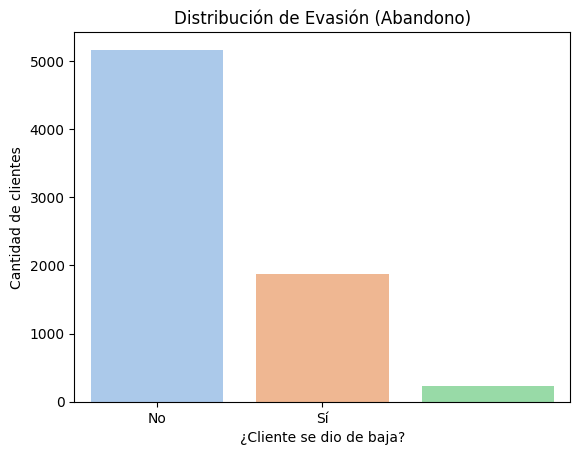

In [17]:
# Conteo de valores de abandono
churn_counts = df_final['Abandono'].value_counts()

# Gráfico de barras
sns.countplot(x='Abandono', hue='Abandono', data=df_final, palette='pastel', legend=False)
plt.title('Distribución de Evasión (Abandono)')
plt.xlabel('¿Cliente se dio de baja?')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['No', 'Sí'])  # Asumiendo que 1 = Sí se dio de baja
plt.show()

Recuento de evasión por variables categóricas

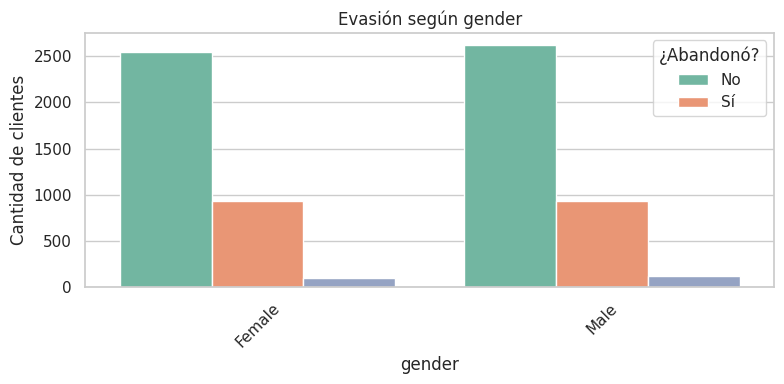

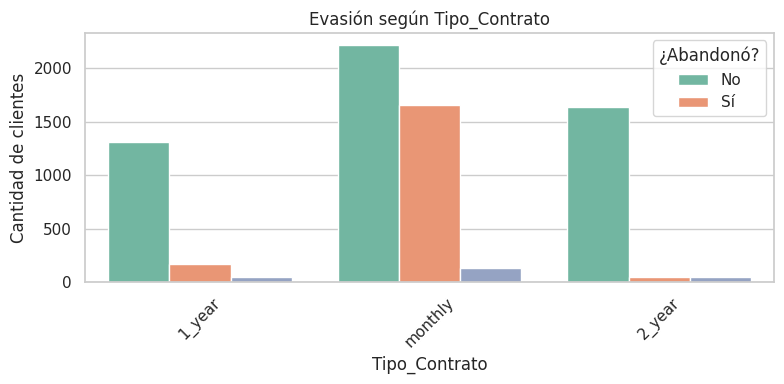

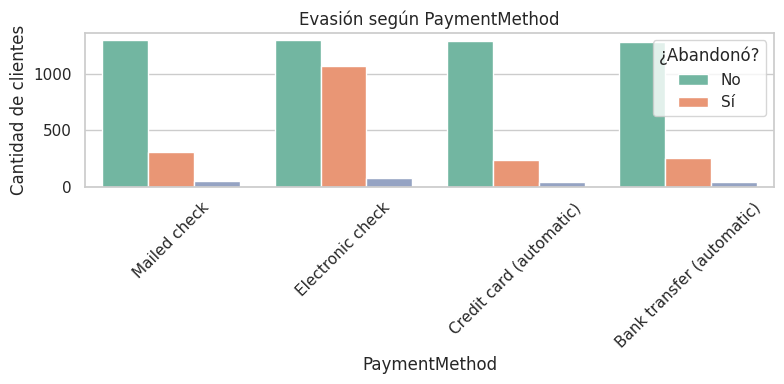

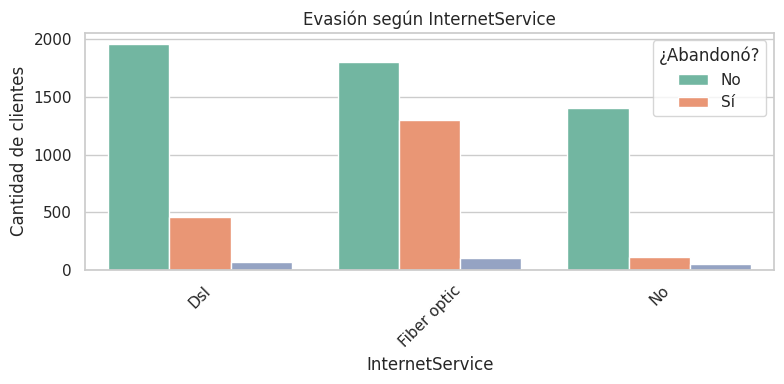

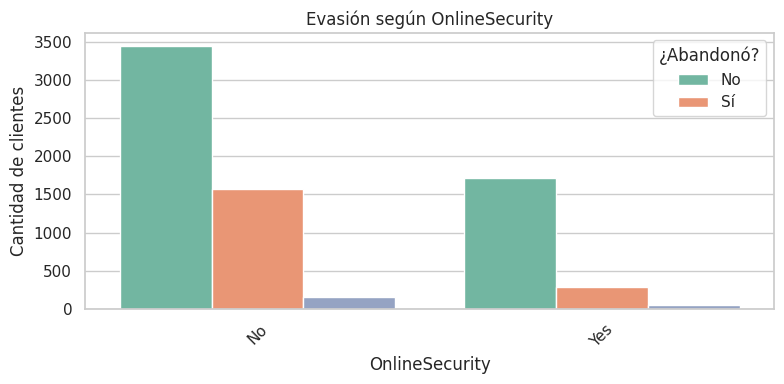

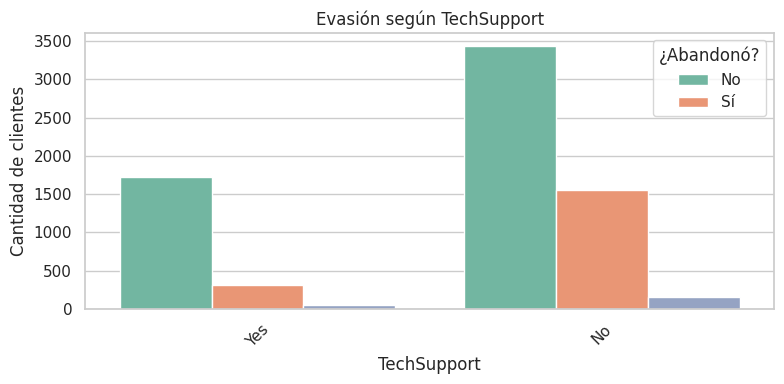

In [18]:
# Lista de variables categóricas a analizar
variables_categoricas = ['gender', 'Tipo_Contrato', 'PaymentMethod',
                         'InternetService', 'OnlineSecurity', 'TechSupport']

# Estilo general
sns.set(style='whitegrid')

# Crear gráficos
for var in variables_categoricas:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_final, x=var, hue='Abandono', palette='Set2')
    plt.title(f'Evasión según {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad de clientes')
    plt.legend(title='¿Abandonó?', labels=['No', 'Sí'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Conteo de evasión por variables numéricas

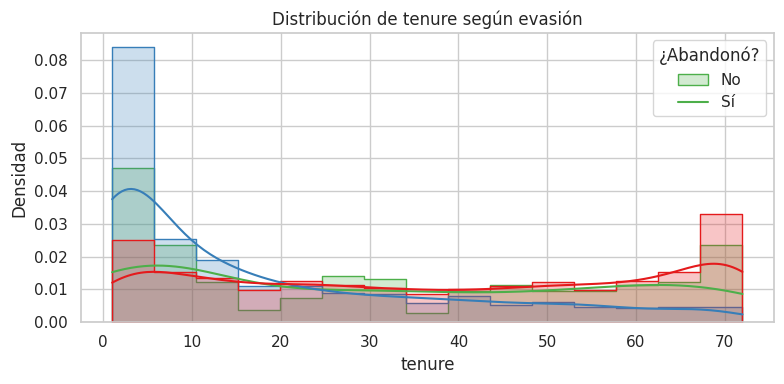

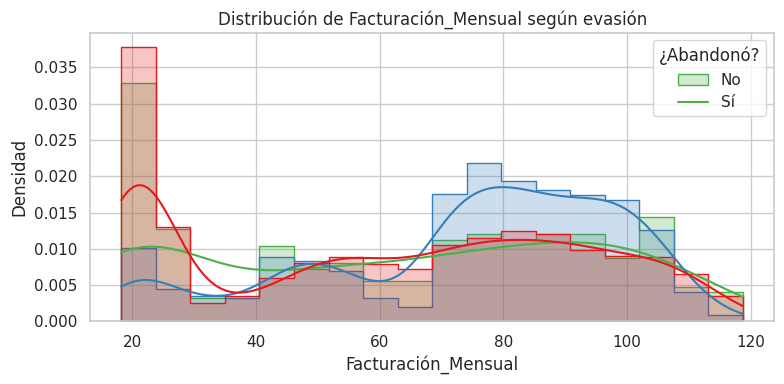

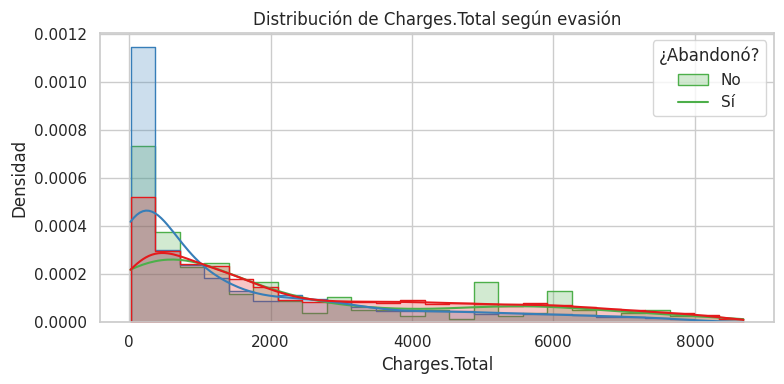

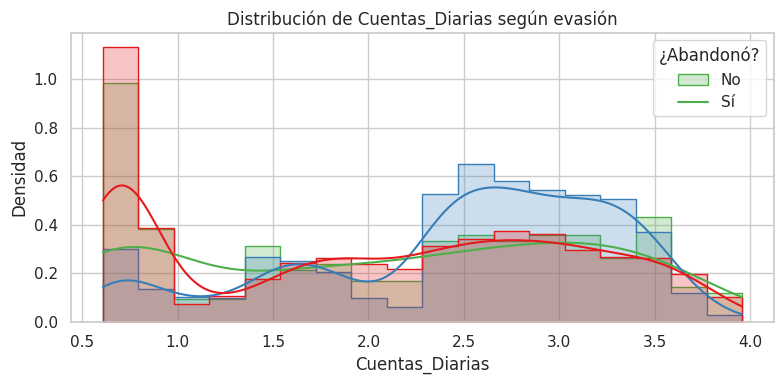

In [21]:
# Variables numéricas que deseas analizar
variables_numericas = ['tenure', 'Facturación_Mensual', 'Charges.Total', 'Cuentas_Diarias']

# Estilo
sns.set(style='whitegrid')

# Histograma por variable
for var in variables_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_final, x=var, hue='Abandono', kde=True, palette='Set1', element='step', stat='density', common_norm=False)
    plt.title(f'Distribución de {var} según evasión')
    plt.xlabel(var)
    plt.ylabel('Densidad')
    plt.legend(title='¿Abandonó?', labels=['No', 'Sí'])
    plt.tight_layout()
    plt.show()

In [20]:
print(df_final.columns)


Index(['customerID', 'Abandono', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Tipo_Contrato',
       'PaperlessBilling', 'PaymentMethod', 'Facturación_Mensual',
       'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')


#📄Informe final

### 🔹 1. Introducción

La evasión de clientes, también conocida como **churn**, representa la cantidad de usuarios que deciden cancelar su servicio dentro de un período determinado. Este problema afecta directamente los ingresos de las empresas, especialmente en sectores altamente competitivos como las telecomunicaciones.

El objetivo de este análisis es identificar patrones y variables que están asociadas con la cancelación del servicio, con el fin de generar **insights estratégicos** que permitan reducir la tasa de evasión y mejorar la retención de clientes.

---

### 🔹 2. Limpieza y Tratamiento de Datos

Se realizaron las siguientes tareas:

- **Importación de datos** desde un archivo CSV.
    
- **Eliminación de valores nulos o vacíos**, especialmente en la columna `Charges.Total`, la cual es crítica para el análisis.
    
- Conversión de tipos de datos para asegurar compatibilidad, como pasar `Charges.Total` de texto a tipo numérico.
    
- Creación de nuevas variables, como `Cuentas_Diarias`, que ayuda a entender la intensidad del uso del servicio.
    
- Renombrado de columnas para facilitar la lectura y consistencia del análisis.
    

---

### 🔹 3. Análisis Exploratorio de Datos

#### 📌 Evasión general

- La tasa de evasión fue del 26.6%, lo que significa que aproximadamente 1 de cada 4 clientes canceló su servicio.
    

#### 📌 Variables categóricas

Se analizaron variables como `gender`, `Tipo_Contrato`, `InternetService`, y `PaymentMethod`.

- Los clientes con contrato **mes a mes** mostraron una mayor tendencia a cancelar el servicio.
    
- Aquellos que utilizan **servicios sin seguridad en línea** también tienen una mayor tasa de evasión.
    
- El método de pago **electronic check** tiene la tasa más alta de churn.
    

✅ Se utilizaron gráficos de barras para visualizar estas distribuciones.

#### 📌 Variables numéricas

Se exploraron variables como `tenure`, `Facturación_Mensual`, `Charges.Total` y `Cuentas_Diarias`.

- Clientes con **tenure bajo** (recién llegados) tienden a cancelar con mayor frecuencia.
    
- Los clientes con **facturas mensuales altas** también tienen mayor probabilidad de evasión.
    
- Se aplicaron histogramas para comparar la densidad de cada variable según la evasión.
    

---

### 🔹 4. Conclusiones e Insights

- Los **nuevos clientes** (menor tiempo de permanencia) representan el grupo más propenso a abandonar el servicio.
    
- El **tipo de contrato** es un factor clave: los contratos mes a mes están más asociados con la evasión que los contratos anuales.
    
- Métodos de pago como **electronic check** pueden estar vinculados a una experiencia menos satisfactoria o clientes menos comprometidos.
    
- La falta de servicios complementarios como **seguridad online o soporte técnico** puede aumentar la posibilidad de cancelación.
    

---

### 🔹 5. Recomendaciones

1. 🎯 **Incentivar contratos a largo plazo** mediante descuentos o beneficios exclusivos.
    
2. 💳 **Fomentar métodos de pago automáticos** como tarjeta de crédito o transferencia bancaria.
    
3. 🛡️ **Promover servicios adicionales** como seguridad en línea o soporte técnico gratuito los primeros meses.
    
4. 🧭 **Desarrollar programas de fidelización** para clientes con bajo tenure.
    
5. 📞 **Implementar estrategias de retención temprana**, como llamadas personalizadas o encuestas a clientes nuevos en los primeros 3 meses.